# 📊 Customer Segmentation using RFM Analysis
This project performs **RFM (Recency, Frequency, Monetary)** analysis to segment customers based on purchasing behavior.

### Objectives
- Clean and prepare transaction data
- Perform RFM feature engineering
- Segment customers based on RFM scores
- Visualize insights and patterns


## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

## 2. Load Dataset

In [2]:
file_path = 'Online Retail.xlsx'

if os.path.exists(file_path):
    df = pd.read_excel(file_path, engine='openpyxl')
    display(df.head())
    print('Dataset shape:', df.shape)
else:
    print('❌ Dataset not found. Please place "Online Retail.xlsx" in the same folder.')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Dataset shape: (541909, 8)


## 3. Data Cleaning

In [3]:
# Drop rows with missing CustomerID
df = df[pd.notnull(df['CustomerID'])]

# Remove cancelled invoices (those starting with 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# Create a TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

display(df.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


## 4. RFM Feature Engineering

In [4]:
# Reference date (last purchase date in dataset)
ref_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Calculate RFM metrics
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (ref_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'
}).reset_index()

rfm.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','TotalPrice':'Monetary'}, inplace=True)
display(rfm.head())

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,310,17,334.40


## 5. RFM Scoring & Segmentation

In [5]:
# Create RFM scores using quantiles
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1,2,3,4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4])

# Combine into RFM Segment
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Score'] = rfm[['R_Score','F_Score','M_Score']].astype(int).sum(axis=1)

display(rfm.head())

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
0,12346.0,326,1,77183.60,1,1,4,114,6
1,12347.0,2,182,4310.00,4,4,4,444,12
2,12348.0,75,31,1797.24,2,2,4,224,8
3,12349.0,19,73,1757.55,3,3,4,334,10
4,12350.0,310,17,334.40,1,1,2,112,4


## 6. Visualization of Segments

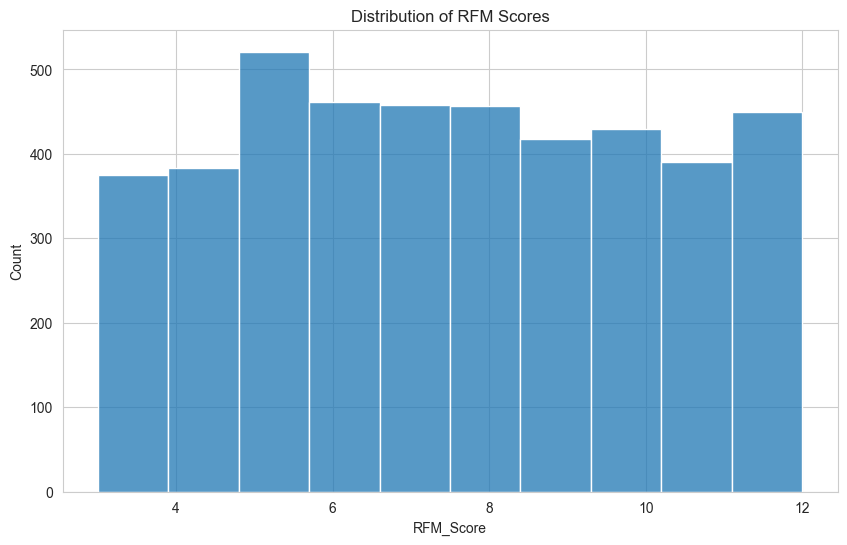

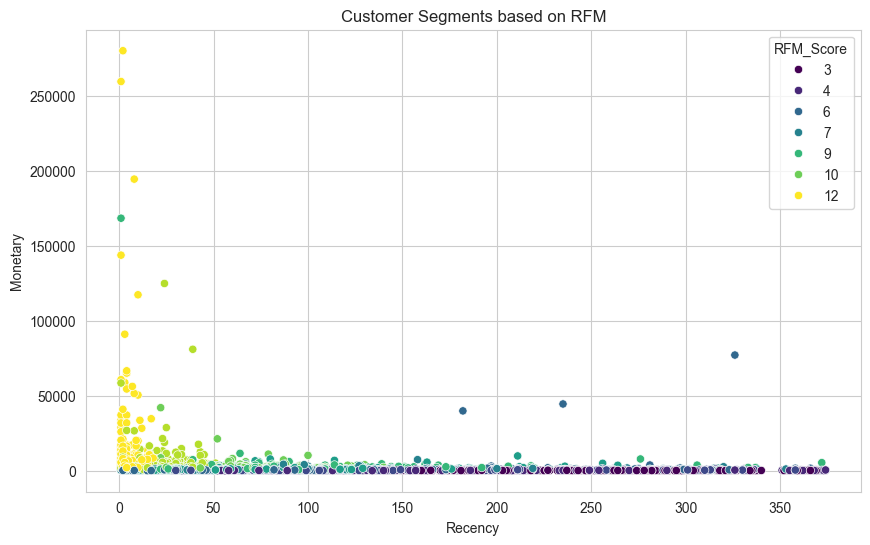

In [6]:
sns.histplot(rfm['RFM_Score'], bins=10, kde=False)
plt.title('Distribution of RFM Scores')
plt.show()

sns.scatterplot(x='Recency', y='Monetary', hue='RFM_Score', data=rfm, palette='viridis')
plt.title('Customer Segments based on RFM')
plt.show()

## 7. Insights & Conclusion
- Customers with **high RFM scores** are the most valuable.
- Low Recency & High Frequency customers are **loyal buyers**.
- High Recency & Low Monetary customers may be **churn risks**.

This analysis helps in designing **targeted marketing strategies** such as:
- Rewarding loyal customers
- Re-engaging inactive customers
- Upselling to high-value customers